In [51]:
import pandas as pd 
import numpy as np 


In [52]:
df=pd.read_csv('Churn_Modelling.csv')

In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [57]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [58]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [59]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [60]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [61]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [62]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [63]:
x_train.shape

(8000, 11)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [65]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [66]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

d:\python\envs\ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [70]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7962 - loss: 0.5178 - val_accuracy: 0.7925 - val_loss: 0.4575
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8006 - loss: 0.4465 - val_accuracy: 0.7962 - val_loss: 0.4351
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8175 - loss: 0.4270 - val_accuracy: 0.8075 - val_loss: 0.4218
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8251 - loss: 0.4195 - val_accuracy: 0.8150 - val_loss: 0.4088
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.3936 - val_accuracy: 0.8300 - val_loss: 0.3941
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.3874 - val_accuracy: 0.8356 - val_loss: 0.3827
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.3849 - val_accuracy: 0.8425 - val_loss: 0.3700
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3730 - val_accu

In [71]:
model.layers[1].get_weights()

[array([[-0.10502934, -0.51335514,  0.17533553,  0.22492681, -0.13120487,
          0.10952289,  0.15117398, -0.7999212 , -0.3443384 ,  0.23610574,
          0.55430245],
        [ 0.0632377 , -0.24448118,  0.6805128 ,  1.0403776 , -0.03273034,
         -0.33388647,  0.0043885 ,  0.72507113,  0.19360518, -0.47795665,
         -0.59569734],
        [ 0.17603031, -0.39915532,  0.5444401 , -0.45567867,  0.29050204,
          0.22643544, -0.4120686 ,  0.28184453, -1.2068179 ,  0.23971334,
          0.43313047],
        [-0.20959473, -0.07797588,  0.24587743, -1.0673834 , -0.00697148,
         -0.70877916, -0.25118557, -0.17799515, -0.4971113 ,  0.0633515 ,
         -0.5449616 ],
        [-0.24847819, -0.893394  ,  0.53816605, -0.19625032,  0.11245075,
          0.36015704,  0.25366905,  0.06487478, -0.67520857, -0.15935577,
         -0.27811232],
        [-0.35777128,  0.78789455, -0.37674224,  0.38947472, -0.14922667,
         -0.26673135, -0.40166262,  0.5190631 , -0.28513974, -0.6520785

In [72]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [73]:
y_pred=np.where(y_log>0.5,1,0)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [75]:
import matplotlib.pyplot as plt

In [76]:
history.history

{'accuracy': [0.7973437309265137,
  0.8068749904632568,
  0.8192187547683716,
  0.8301562666893005,
  0.8378124833106995,
  0.8432812690734863,
  0.8506249785423279,
  0.850781261920929,
  0.8551562428474426,
  0.8570312261581421,
  0.8571875095367432,
  0.8614062666893005,
  0.8592187762260437,
  0.8609374761581421,
  0.8604687452316284,
  0.8618749976158142,
  0.8612499833106995,
  0.86328125,
  0.8614062666893005,
  0.8631250262260437,
  0.8614062666893005,
  0.862500011920929,
  0.8620312213897705,
  0.8628125190734863,
  0.8626562356948853,
  0.8620312213897705,
  0.8650000095367432,
  0.8620312213897705,
  0.8635937571525574,
  0.8626562356948853,
  0.8635937571525574,
  0.862500011920929,
  0.8635937571525574,
  0.8629687428474426,
  0.8646875023841858,
  0.8628125190734863,
  0.8615624904632568,
  0.8621875047683716,
  0.8634374737739563,
  0.8639062643051147,
  0.8643749952316284,
  0.8628125190734863,
  0.8631250262260437,
  0.8621875047683716,
  0.8639062643051147,
  0.86374

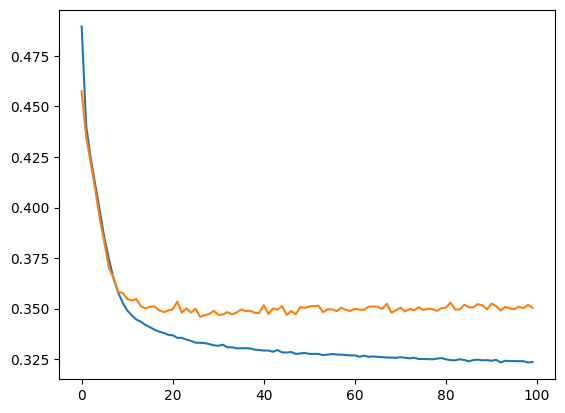

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

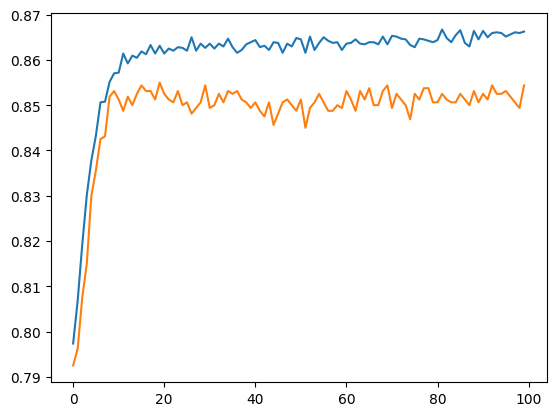

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
